# 1. Functions, libraries and packeges

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import kaggle

In [100]:
def dataframe_info(df: pd.DataFrame):
    """
    Generate a summary DataFrame containing metadata about the columns of the input DataFrame.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: A summary DataFrame with the following columns:
            - Column_name: Name of each column.
            - Total records: Total number of records in each column.
            - Missing Values: Number of missing (NaN) values in each column.
            - Data type: Data type of each column.
            - Unique values: Number of unique values in each column.
    """
    df_summary = pd.DataFrame({
        'Column_name': df.columns,
        'Total records': [df[col].size for col in df.columns],
        'Missing Values': [df[col].isna().sum() for col in df.columns],
        'Data type': [df[col].dtype for col in df.columns],
        'Unique values': [df[col].nunique() for col in df.columns]
    })

    return df_summary

# 2. Data import

In [101]:
kaggle.api.authenticate()
kaggle.api.dataset_download_files('johnsmith88/heart-disease-dataset', path = './data', unzip = True)

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset


In [102]:
df = pd.read_csv(r'data\heart.csv')

In [103]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# 2. Model
 - There is no EDA and feture engineering (dataset preprepared)

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X, y = df.drop('target', axis=1), df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((656, 13), (164, 13), (205, 13))

## 2.1 Scale Insensitive models

In [106]:
from sklearn.ensemble import RandomForestClassifier

forrest = RandomForestClassifier(random_state = 42)
forrest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [107]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [108]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

## 2.2 Scale sensitive

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [111]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [112]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

## 2.3 Evaluation

### 2.3.1 Accuracy

In [113]:
forrest.score(X_val, y_val)

0.9939024390243902

In [114]:
nb_clf.score(X_val, y_val)

0.8658536585365854

In [115]:
gb_clf.score(X_val, y_val)

0.975609756097561

In [116]:
knn.score(X_val_scaled, y_val)

0.8719512195121951

In [117]:
log.score(X_val_scaled, y_val)

0.9024390243902439

In [118]:
svc.score(X_val_scaled, y_val)

0.9512195121951219

### 2.3.2 Recall

- It is not that bad if I say that someone has heart disease and actually does not have
- Problem is If someone is healthy and actually has heart disease

In [119]:
# Accuracy: 100 --> 80 --> 80%
# Precision: 200 --> 200 has problem --> 100 actually have --> 50%
# Recall: 100 pations with problem --> 100%

In [120]:
from sklearn.metrics import recall_score

In [121]:
y_preds = forrest.predict(X_val)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for Random Forest: {y_recall}')

y_preds = nb_clf.predict(X_val)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for NB: {y_recall}')


y_preds = gb_clf.predict(X_val)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for GB: {y_recall}')

Recall score for Random Forest: 1.0
Recall score for NB: 0.9285714285714286
Recall score for GB: 0.9880952380952381


In [122]:
y_preds = knn.predict(X_val_scaled)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for KNN: {y_recall}')

y_preds = log.predict(X_val_scaled)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for LOG: {y_recall}')


y_preds = svc.predict(X_val_scaled)
y_recall = recall_score(y_val, y_preds)
print(f'Recall score for SVC: {y_recall}')

Recall score for KNN: 0.9166666666666666
Recall score for LOG: 0.9761904761904762
Recall score for SVC: 0.9642857142857143


### 2.3.3 ROC curve

In [126]:
from sklearn.metrics import roc_auc_score, roc_curve

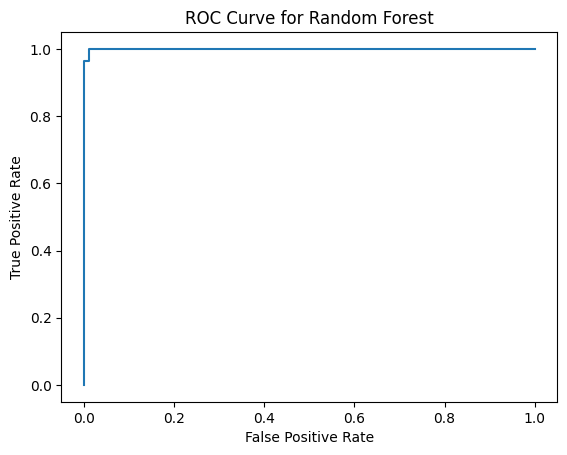

In [128]:
y_probs = forrest.predict_proba(X_val)[:, 1]

fpr,tpr, thresholds = roc_curve(y_val,y_probs)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.show()


In [ ]:
# to get 100% true positive rate, we get 5% false positive rate-->chart

In [129]:
roc_auc = roc_auc_score(y_val, y_probs)
roc_auc


np.float64(0.9995535714285714)

C:\Users\ondra\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


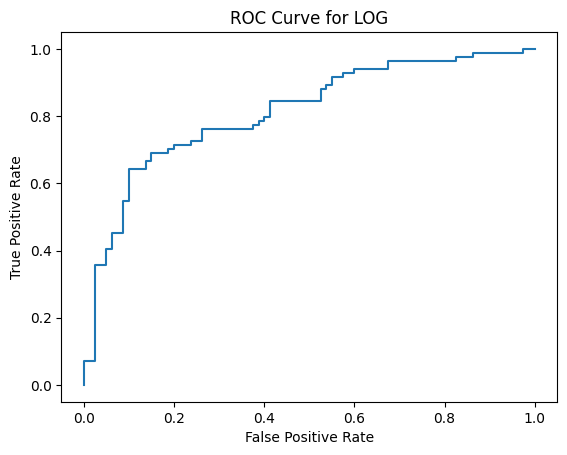

In [130]:
y_probs = log.predict_proba(X_val)[:, 1]

fpr,tpr, thresholds = roc_curve(y_val,y_probs)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LOG')
plt.show()

# 2.4 Hyperparameter tunning